In [7]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import itertools

In [2]:
def basis_generator(N):
  """
  N : total number of sites
  N//2 : number of electrons
  N//2 : number of unit cells
  """
  basis = []

  for combination_indices in itertools.combinations(range(N), N // 2):
    state = [0] * N
    # state = np.zeros((N))
    for index in combination_indices:
      state[index] = 1
    basis.append(state)

  final_basis = []

  flag = 0
  for i in range(len(basis)):
    for j in range(0, N, 2):
      if (int(basis[i][j] + basis[i][j + 1]) == 2) or (int(basis[i][j] + basis[i][j + 1]) == 0):
        flag = 1
        break
    if flag == 0:
      final_basis.append(basis[i])
      # print(basis[i])
    else:
      flag = 0

  return np.array(final_basis)


# print(basis_generator(6))

In [3]:
def hamiltonian_generator(N, basis, v, w):
  d = len(basis)
  H = np.zeros((d, d))

  for i in range(d):
    for j in range(d):
      H[i][j] = H_ij(i, j, basis, N, v, w)

  return H


def H_ij(i, j, basis, N, v, w):
  ket = basis[i]
  H_ket = np.zeros((N))
  bra = basis[j]
  H_element = 0
  for k in range(0, N):
    if ket[k] == 1:
      H_ket[k] = 0
    else:
      H_ket[k] = C_dag(k, ket, v, w, N)

  for k in range(0, N):
    H_element += H_ket[k] * bra[k]

  return H_element #, H_ket



def C(k, ket):
  if ket[k] == 0:
    return 0
  else:
    return 1


def C_dag(k, ket, v, w, N):
  res = 0
  if k // 2 == 0:
    if ket[k + 1] == 1:
      res += v
    if k != 0 and ket[k - 1] == 1:
      res += w
  else:
    if ket[k - 1] == 1:
      res += v
    if k != N - 1 and ket[k + 1] == 1:
      res += w
  return res

In [ ]:
N = 6
v = 1
w = 2
k = 1
basis = basis_generator(N)
H_element, H_ket = H_ij(0, 0, basis, N, v, w)
print(H_element)
print(H_ket)
# print(C_dag(k, basis[0], v, w, N))

4.0
[0. 3. 0. 3. 0. 1.]


In [6]:
N = 4
v = 1
w = 2
basis = basis_generator(N)
print(basis)

hamiltonian_matrix = hamiltonian_generator(N, basis, v, w)
print(hamiltonian_matrix)

[[1 0 1 0]
 [1 0 0 1]
 [0 1 1 0]
 [0 1 0 1]]
[[0. 1. 3. 4.]
 [2. 0. 4. 2.]
 [1. 2. 0. 1.]
 [4. 1. 3. 0.]]


[[0. 0. 1. 1. 1. 1. 2. 2.]
 [1. 0. 1. 0. 2. 1. 2. 1.]
 [1. 1. 0. 0. 2. 2. 1. 1.]
 [2. 1. 1. 0. 3. 2. 2. 1.]
 [0. 0. 1. 1. 0. 0. 1. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]
 [1. 1. 0. 0. 1. 1. 0. 0.]
 [2. 1. 1. 0. 2. 1. 1. 0.]]
False
[[0.  0.3 1.3 1.6 1.3 1.6 2.6 2.9]
 [1.  0.  1.3 0.3 2.3 1.3 2.6 1.6]
 [1.  1.3 0.  0.3 2.  2.3 1.  1.3]
 [2.3 1.  1.3 0.  3.3 2.  2.3 1. ]
 [0.3 0.6 1.6 1.9 0.  0.3 1.3 1.6]
 [1.3 0.3 1.6 0.6 1.  0.  1.3 0.3]
 [1.6 1.9 0.3 0.6 1.3 1.6 0.  0.3]
 [2.9 1.6 1.6 0.3 2.6 1.3 1.3 0. ]]
False
[[0.  0.6 1.6 2.2 1.6 2.2 3.2 3.8]
 [1.  0.  1.6 0.6 2.6 1.6 3.2 2.2]
 [1.  1.6 0.  0.6 2.  2.6 1.  1.6]
 [2.6 1.  1.6 0.  3.6 2.  2.6 1. ]
 [0.6 1.2 2.2 2.8 0.  0.6 1.6 2.2]
 [1.6 0.6 2.2 1.2 1.  0.  1.6 0.6]
 [2.2 2.8 0.6 1.2 1.6 2.2 0.  0.6]
 [3.8 2.2 2.2 0.6 3.2 1.6 1.6 0. ]]
False
[[0.  0.9 1.9 2.8 1.9 2.8 3.8 4.7]
 [1.  0.  1.9 0.9 2.9 1.9 3.8 2.8]
 [1.  1.9 0.  0.9 2.  2.9 1.  1.9]
 [2.9 1.  1.9 0.  3.9 2.  2.9 1. ]
 [0.9 1.8 2.8 3.7 0.  0.9 1.9 2.8]
 [1.9 0.9 2.8 1.8 1.  0.  1.

<ipython-input-4-a3f26bb50b01>:19: ComplexWarning: Casting complex values to real discards the imaginary part
  E_arr_2[j,i] = E_arr[i][j]


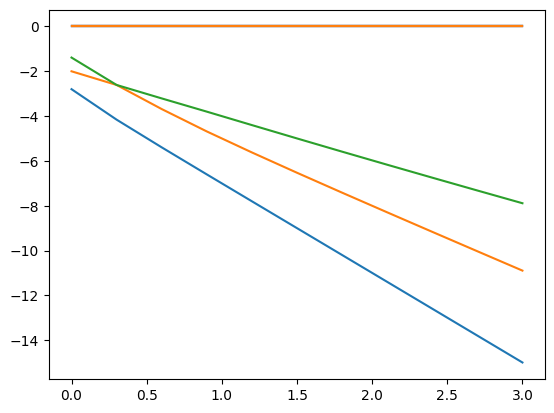

In [4]:
steps = 11
v_arr = np.linspace(0, 3, steps)
w = 1
N = 4
E_arr = []
basis = basis_generator(N)
for i, v in enumerate(v_arr):
  H = hamiltonian_generator(N, basis, v, w)

  e_val, e_vec = np.linalg.eig(H)
  print(H)
  print(sp.linalg.ishermitian(H))
  E_arr.append(np.sort(e_val))

E_arr_2 = np.zeros((2*N, steps), dtype=np.float64)

for i in range(steps):
  for j in range(N):
    E_arr_2[j,i] = E_arr[i][j]

# print(E_arr_2)
for e_arr in E_arr_2:
  plt.plot(v_arr,e_arr)
plt.show()

